In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import numpy as np

In [18]:
names = ['bio1', 'bio2', 'bio3','bio4', 'bio5', 'bio6','bio7', 'bio8', 'bio9','bio10', 'bio11', 'bio12','bio13', 'bio14', 'bio15','bio16','bio17', 'bio18', 'bio19']

In [38]:
xr_df = xr.open_dataset('data/out/biocliamtic_CR2_1979_2016/bio1.nc', decode_times=False)
lons = xr_df['lon'].values
lats = xr_df['lat'].values
sst = xr_df['bio1'].values[0,:,:]
print(sst)
print(sst[0][0])
mask = sst==sst[0][0]
print(mask)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
nan
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


### Solucionar:
 - Arreglo de maskara, probablemente se debera hacer una funcion
 - Arreglo de tamanio de imagen en los bordes
 - Arreglo de valores en barra de color (cortar mapa)

<ipython-input-39-23ef78347000>:26: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor(c[1])


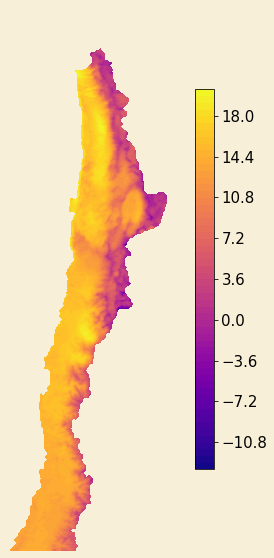

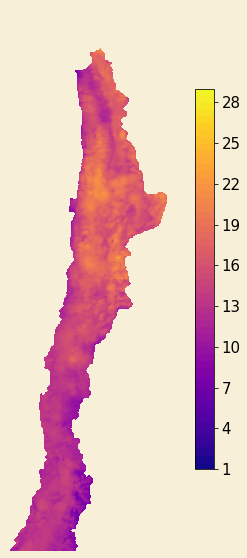

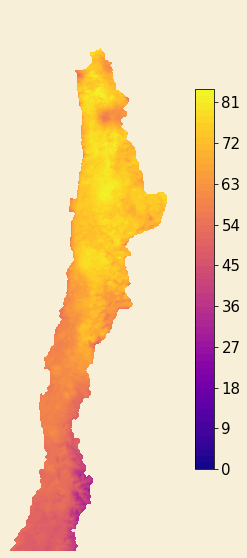

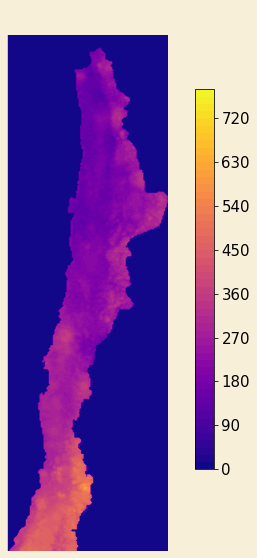

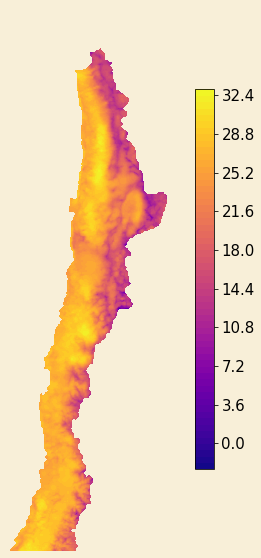

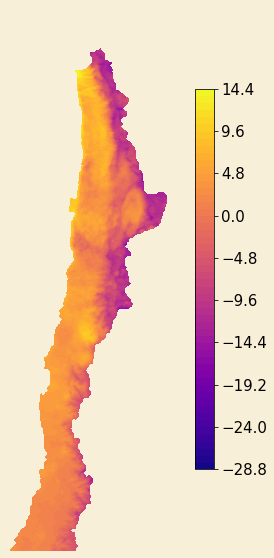

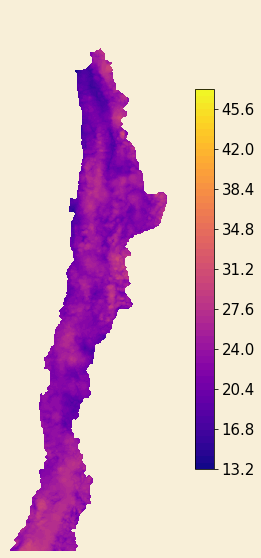

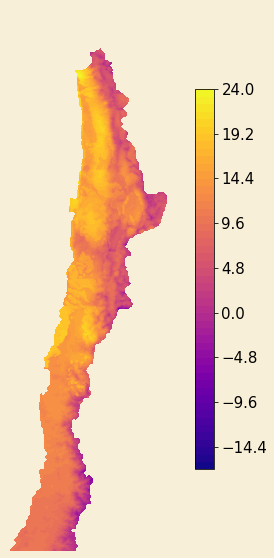

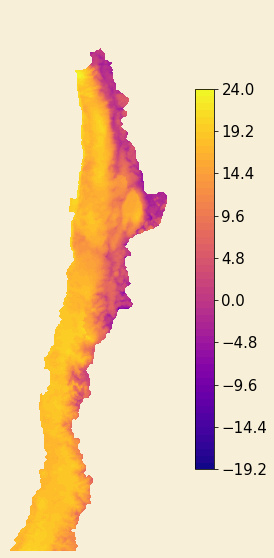

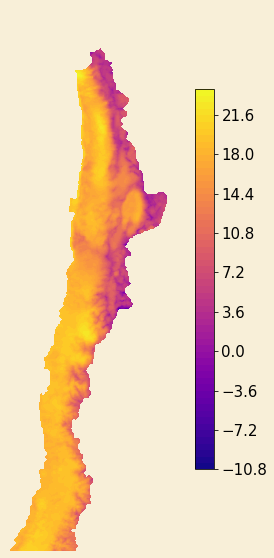

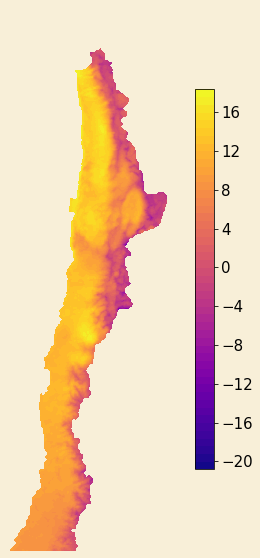

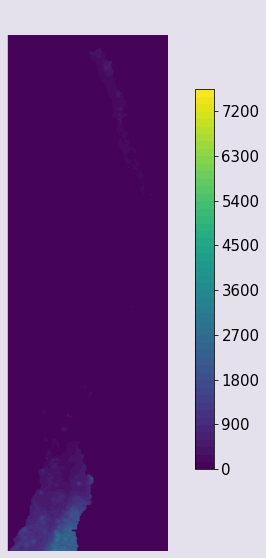

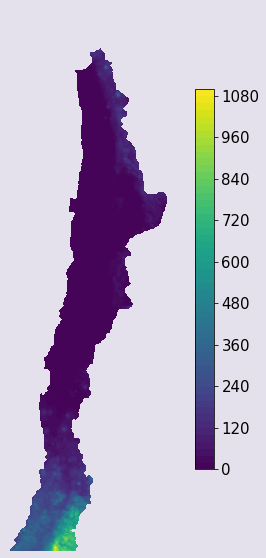

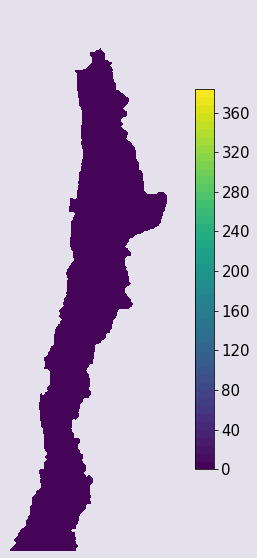

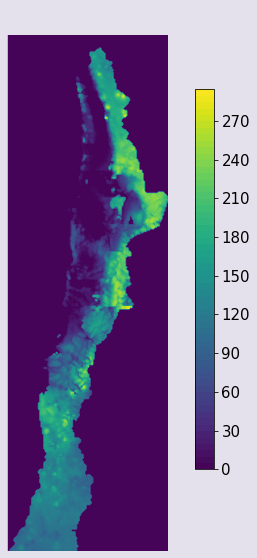

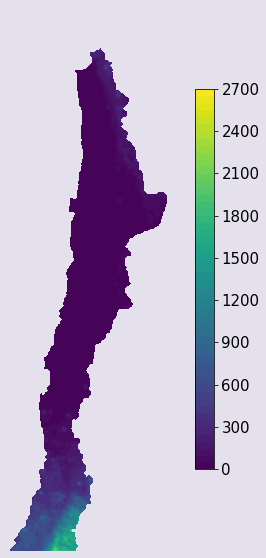

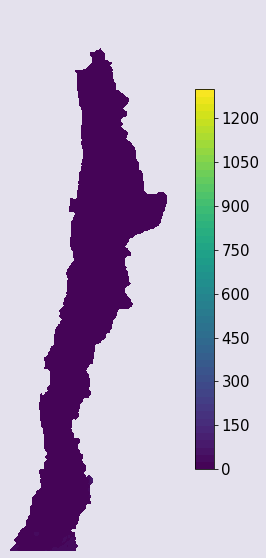

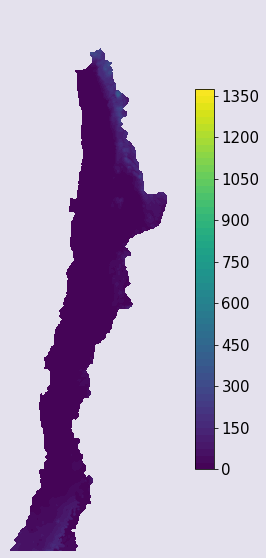

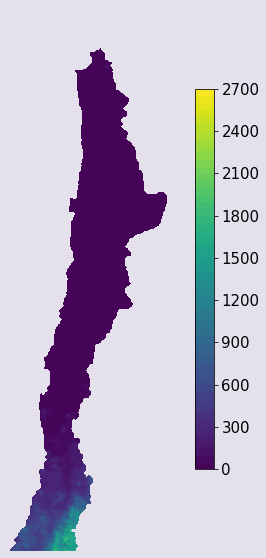

In [39]:
color_p = ['viridis', '#e4e1ed']
color_t = ['plasma', '#f8efd8']

for i in range(0,len(names)):
    name = names[i]

    if i>10:
        c = color_p
    else:
        c = color_t
        
    xr_df = xr.open_dataset('data/out/biocliamtic_CR2_1979_2016/'+name+'.nc', decode_times=False)
    lons = xr_df['lon'].values
    lats = xr_df['lat'].values
    sst = xr_df[name].values[0,:,:]
    #print(np.shape(sst))
    #sst = sst[mask] 
    #print(np.shape(sst))
    plt.rcParams.update({'font.size': 15})

    fig = plt.figure(figsize=(10,10))

    fig.patch.set_facecolor(c[1])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-67, -72.9, -36, -16])
    ax.outline_patch.set_edgecolor(c[1])

    z1_plot = plt.contourf(lons, lats, sst, 60,
                 transform=ccrs.PlateCarree(), cmap = c[0])

    plt.colorbar(ax=ax, shrink=.7)
    ax.set_facecolor(c[1])


    '''rect = plt.Rectangle(
        # (lower-left corner), width, height
        (.5, .12), 0.37, 0.77, fill=False, color="k", lw=2, 
        zorder=1000, transform=fig.transFigure, figure=fig
    )'''

    #fig.patches.extend([rect])
    plt.show()